About this file
For this project, you will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Your goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
import pandas as pd

# read in the ab_test.csv file
ab_test = pd.read_csv('/content/ab_test.csv')

# read in the countries_ab.csv file
countries = pd.read_csv('/content/countries_ab.csv')

# merge the two files on the id field
data = pd.merge(ab_test, countries, on='id')

# preview the merged data
print(data.head())

       id     time  con_treat      page  converted country
0  851104  11:48.6    control  old_page          0      US
1  804228  01:45.2    control  old_page          0      US
2  661590  55:06.2  treatment  new_page          0      US
3  853541  28:03.1  treatment  new_page          0      US
4  864975  52:26.2    control  old_page          1      US


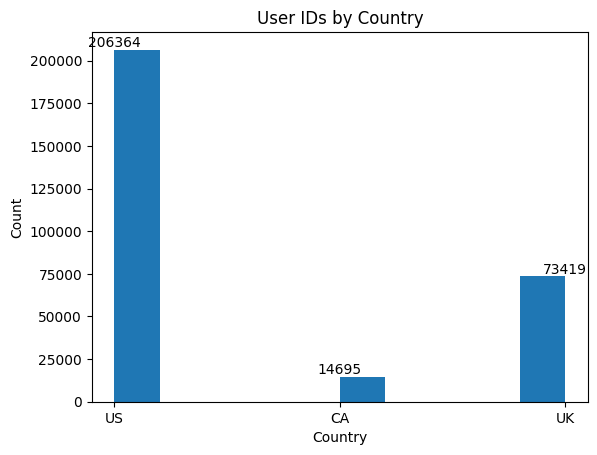

In [ ]:
# create a histogram of user IDs by country
plt.hist(data['country'])
plt.title('User IDs by Country')
plt.xlabel('Country')
plt.ylabel('Count')
for i, country in enumerate(data['country'].unique()):
    count = data[data['country'] == country]['id'].count()
    plt.text(i, count + 10, str(count), ha='center', va='bottom')
plt.show()

In [ ]:
data.head()

,id,time,con_treat,page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


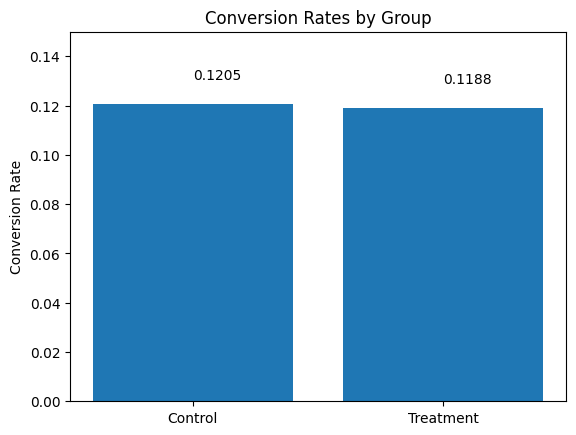

In [ ]:
# group the data by con_treat and calculate the conversion rates for each group
con_treat_data = data.groupby('con_treat')['converted'].mean()
# calculate the conversion rates for each group
control_rate = control['converted'].mean()
treatment_rate = treatment['converted'].mean()

# create a bar chart of the conversion rates
plt.bar(['Control', 'Treatment'], [control_rate, treatment_rate])
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.15)
plt.text(0, control_rate + 0.01, f'{control_rate:.4f}')
plt.text(1, treatment_rate + 0.01, f'{treatment_rate:.4f}')
plt.show()

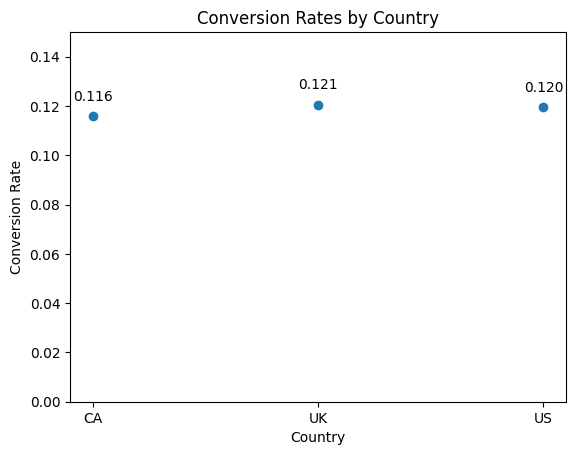

In [ ]:
# group the data by country and calculate the conversion rates for each group
country_data = data.groupby('country')['converted'].mean().reset_index()

# create a scatter plot of conversion rates by country
plt.scatter(country_data['country'], country_data['converted'])
plt.title('Conversion Rates by Country')
plt.xlabel('Country')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.15)
for i, row in country_data.iterrows():
    plt.text(row['country'], row['converted'] + 0.005, f'{row["converted"]:.3f}', ha='center', va='bottom')
plt.show()

In [ ]:
# split the data into control and treatment groups
control = data[data['page'] == 'old_page']
treatment = data[data['page'] == 'new_page']

# loop through each country and calculate conversion rates
for country in data['country'].unique():
    # filter the data by country and control/treatment groups
    country_control = control[control['country'] == country]['converted']
    country_treatment = treatment[treatment['country'] == country]['converted']

    # calculate the conversion rates for each group
    control_rate = country_control.mean()
    treatment_rate = country_treatment.mean()

    # conduct a hypothesis test to determine whether the difference in rates is significant
    p_value = stats.ttest_ind(country_control, country_treatment)[1]

    # print the results
    print(f'Country: {country}')
    print(f'Control conversion rate: {control_rate:.4f}')
    print(f'Treatment conversion rate: {treatment_rate:.4f}')
    print(f'P-value: {p_value:.4f}')
    if p_value < 0.05:
        print('Statistically significant difference\n')
    else:
        print('No statistically significant difference\n')

Country: US
Control conversion rate: 0.1208
Treatment conversion rate: 0.1184
P-value: 0.0971
No statistically significant difference

Country: CA
Control conversion rate: 0.1193
Treatment conversion rate: 0.1125
P-value: 0.1946
No statistically significant difference

Country: UK
Control conversion rate: 0.1198
Treatment conversion rate: 0.1213
P-value: 0.5365
No statistically significant difference



US: The control conversion rate is 0.1208, meaning that 12.08% of users who saw the old page converted. The treatment conversion rate is 0.1184, meaning that 11.84% of users who saw the new page converted. The p-value is 0.0971, which is not less than 0.05 (the usual significance level), indicating that the difference in conversion rates is not statistically significant. Therefore, we cannot conclude that the new page is more effective than the old page for users in the US.

CA: The control conversion rate is 0.1193, meaning that 11.93% of users who saw the old page converted. The treatment conversion rate is 0.1125, meaning that 11.25% of users who saw the new page converted. The p-value is 0.1946, which is not less than 0.05, indicating that the difference in conversion rates is not statistically significant. Therefore, we cannot conclude that the new page is more effective than the old page for users in Canada.

UK: The control conversion rate is 0.1198, meaning that 11.98% of users who saw the old page converted. The treatment conversion rate is 0.1213, meaning that 12.13% of users who saw the new page converted. The p-value is 0.5365, which is not less than 0.05, indicating that the difference in conversion rates is not statistically significant. Therefore, we cannot conclude that the new page is more effective than the old page for users in the UK.

Overall, based on these results, we cannot conclude that the new page is more effective than the old page for any of the countries in the dataset, as the p-values are not less than 0.05. Therefore, the company should keep the old page or consider running the experiment longer to gather more data.